In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')

## Intro to Beautiful Soup

In [3]:
#URL to be scraped
url = 'http://quotes.toscrape.com'

#Content collected from URL
content = urlopen(url).read()

#BeautifulSoup parser of content
soup = BeautifulSoup(content, 'html.parser')

In [4]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="

In [7]:
"""
    soup.find() - Retrieves first element that matches filter.
    Returns BeautifulSoup Tag element
    
    soup.find_all(): Will retrieve all elements that match filter
    Returns BeautifulSoup ResultSet object that contains BeautifulSoup Tag objects
    
    BeautifulSoupTagObject.get(attribute): Method for BeautifulSoup Tag Objects to retrieve a tag attribute.
    Returns attribute as String
    
    BeautifulSoupTagObject.text: Method to retrieve element content from BeautifulSoup Tag Objects.
    Returns HTML Element Content as String
    
"""

print(" Tag Object:", soup.find('a'), 
      '\n', "String:", soup.find('a').text, 
      '\n', "String:", soup.find('a').get('href'))

 Tag Object: <a href="/" style="text-decoration: none">Quotes to Scrape</a> 
 String: Quotes to Scrape 
 String: /


#### Extract All Quotes and Authors From the First Page

In [8]:
for elem in soup.find_all('...', '...'):
    quote = elem.find('...', '...')#TODO: ADD METHOD
    author = elem.find('...', '...')#TODO: ADD METHOD
    print(quote, '-', author, '\n')

#### Find the Link to the Next Page

In [9]:
soup.find('...', '...').find('...').get('...')

AttributeError: 'NoneType' object has no attribute 'find'

#### Extract All Quotes and Authors from All Pages

In [10]:
base_url ='http://quotes.toscrape.com{}'
page=''

while True:
    current_content = urlopen(base_url.format(page))
    good_soup = BeautifulSoup(current_content, 'html.parser')
    
    # This part is the same as the first problem
    for elem in good_soup.find_all('...', '...'):
        quote = elem.find('...', '...')#TODO: ADD METHOD
        author = elem.find('...', '...')#TODO: ADD METHOD
        print(quote, '-', author, '\n')
    
    # What did we do in the previous cell?
    link = good_soup.find('...', '...')

    if link is None:
        break
    else:
        page = link.find('...').get('...')

## AITA Sub-Reddit Demonstration

In [11]:
reddit = "https://old.reddit.com/r/AmItheAsshole/comments/dqiutw/aita_for_leaving_a_bad_review_after_i_said_i/"

reddit_content = urlopen(reddit).read()

reddit_soup = BeautifulSoup(reddit_content, 'html.parser')

reddit_soup

<!DOCTYPE doctype html>
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><title>AITA for leaving a bad review after I said I wouldn't? : AmItheAsshole</title><meta content=" reddit, reddit.com, vote, comment, submit " name="keywords"/><meta content="A catharsis for the frustrated moral philosopher in all of us, and a place to finally find out if you were wrong in an argument that's been..." name="description"/><meta content="always" name="referrer"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"><link href="/static/opensearch.xml" rel="search" type="application/opensearchdescription+xml"/><link href="https://www.reddit.com/r/AmItheAsshole/comments/dqiutw/aita_for_leaving_a_bad_review_after_i_said_i/" rel="canonical"/><link href="https://amp.reddit.com/r/AmItheAsshole/comments/dqiutw/aita_for_leaving_a_bad_review_after_i_said_i/" rel="amphtml"/><meta content="width=1024" name="viewport"/><meta content="noindex,nofollow" name="robots"><link hre

#### Find the Comments

In [12]:
comments = reddit_soup.find_all('div', 'md')
comments

[<div class="md"><p><strong>Welcome to <a href="/r/AmITheAsshole">r/AmITheAsshole</a>!</strong></p>
 <p><a href="http://www.reddit.com/r/amitheasshole"></a></p>
 <p>A catharsis for the frustrated moral philosopher in all of us, and a place to finally find out if you were wrong in an argument that's been bothering you. Tell us about any non-violent conflict you have experienced; give us both sides of the story, and find out if you're right, or you're the asshole.</p>
 <p>This is the sub to lay out your  actions and conflicts and get impartial judgment rendered against you.  Were you the asshole in that situation or not? Post should be truthful and reflect real situations. That means no shitposts, parody, or satire. </p>
 <p>After 18 hours, your post will be given a flair representing the final judgment on your matter.  This flair is determined by the subscribers who have both rendered judgment and voted on which judgment is best.  <strong><em>The power of the crowd will judge you</em></

#### Find All The Comments

In [13]:
counter = {"YTA": 0, "NTA": 0, "ESH": 0, "NAH": 0, "INFO": 0}

for comment in comments:

    text = comment.find('p').text
    
    for vote in counter.keys():
        if vote in text:
            counter[vote] += 1
    
    print(text, '\n')

Welcome to r/AmITheAsshole! 

This post is locked. You won't be able to comment. 

If you want your comment to count toward judgment, include only ONE of the following abbreviations in your comment. If you don't include a judgement abbreviation, the bot will ignore you when it looks for the top voted comment. 

NTA i think if your honest review includes both that they honored the price they said they would but ONLY after you complained about it then that is completely fair. 

My thoughts exactly.  As long as the whole story is told, including the final outcome of getting the advertised price, then it wouldn't be a false review.    

Meaning, don't trash and completely eviscerate the business, but it's totally fair to describe your experience. No need to Karen it. 

If you want to trash the business, you don’t Karen it. That way, everyone knows it’s a Karen who made the review. The real poison pill is that 1.5 review stating the actual facts, as well as how it sucked even though they di

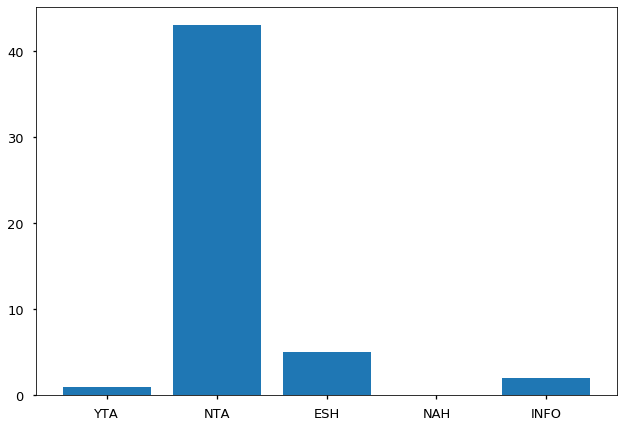

In [14]:
plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))

plt.show()